In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
data2 = pd.read_csv("C:\\Users\\chatu\\Downloads\\US_Regional_Sales_Data.csv")
print(data1.shape)

(7991, 22)


In [3]:
data1.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


In [4]:
data1.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.114394
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085570
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.075000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000


In [5]:
missing_data = data1.isnull().sum()
print(missing_data)

OrderNumber         0
Sales Channel       0
WarehouseCode       0
ProcuredDate        0
OrderDate           0
ShipDate            0
DeliveryDate        0
CurrencyCode        0
_SalesTeamID        0
_CustomerID         0
_StoreID            0
_ProductID          0
Order Quantity      0
Discount Applied    0
Unit Cost           0
Unit Price          0
dtype: int64


In [6]:
data1['Unit Cost'] = data1['Unit Cost'].replace('[,]', '', regex = True).astype(float)
data1['Unit Price'] = data1['Unit Price'].replace('[,]', '', regex = True).astype(float)
data1[['Unit Cost', 'Unit Price']].dtypes

Unit Cost     float64
Unit Price    float64
dtype: object

In [7]:
data1['Revenue'] = data1['Unit Price'] * data1['Order Quantity']
data1.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Revenue
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,1001.18,1963.1,9815.5
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,3348.66,3939.6,11818.8
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,1775.5,1775.5
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,1464.69,2324.9,18599.2
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,1476.14,1822.4,14579.2


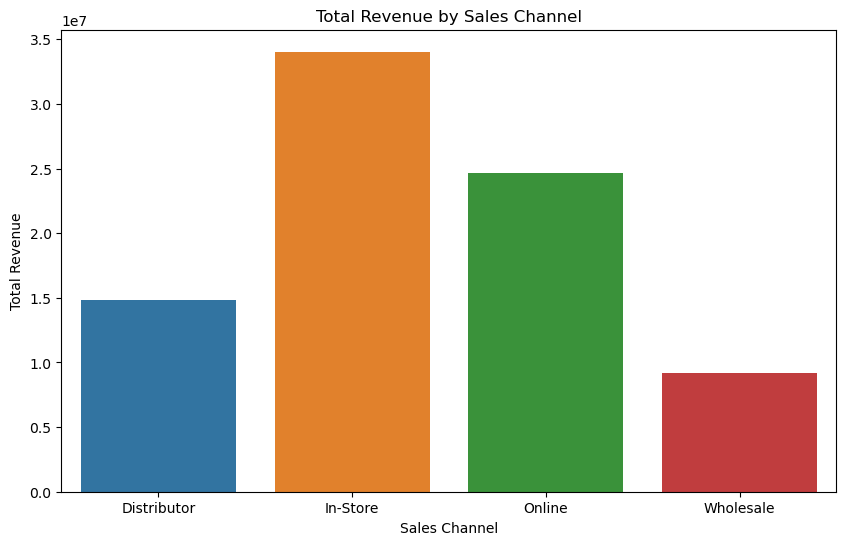

In [8]:
channel_performance = data1.groupby('Sales Channel').agg(
    Total_Revenue=('Revenue', 'sum'),
    Average_Discount=('Discount Applied', 'mean'),
    Total_Orders=('OrderNumber', 'nunique')
).reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=channel_performance, x='Sales Channel', y='Total_Revenue')
plt.title("Total Revenue by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue")
plt.show()

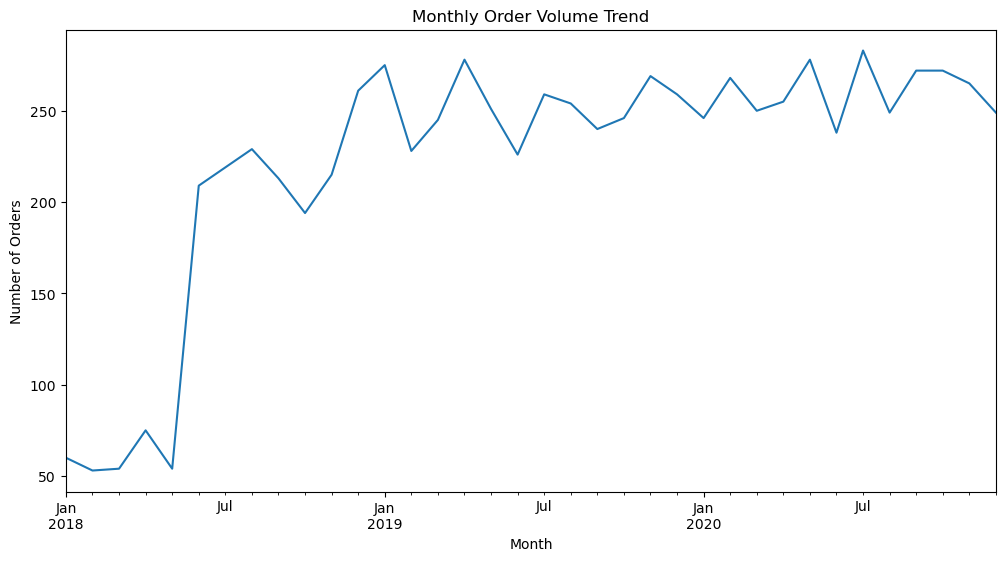

In [18]:

monthly_orders = data1.set_index('OrderDate').resample('M').size()

plt.figure(figsize=(12, 6))
monthly_orders.plot()
plt.title("Monthly Order Volume Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


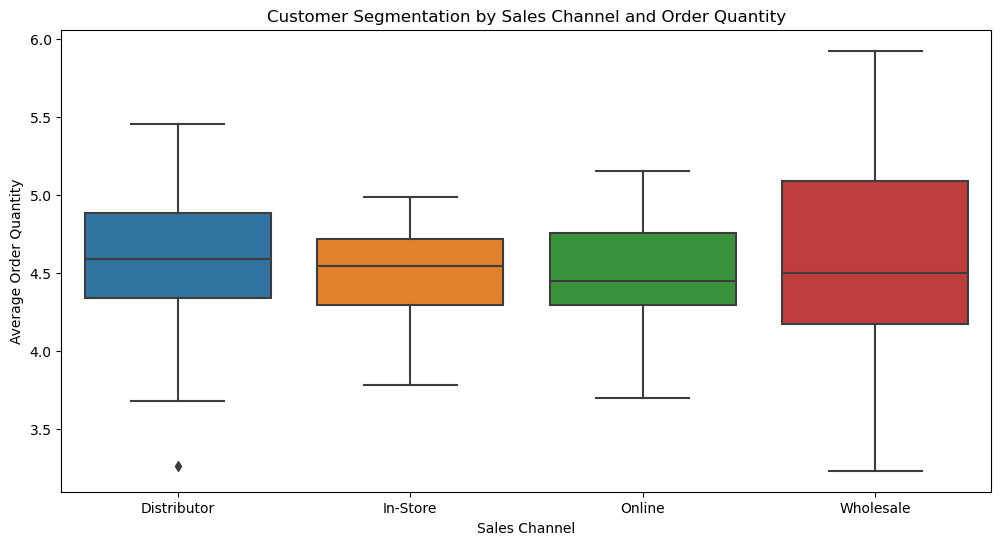

In [10]:
customer_segmentation = data1.groupby(['_CustomerID', 'Sales Channel']).agg(
    Avg_Order_Quantity=('Order Quantity', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=customer_segmentation, x='Sales Channel', y='Avg_Order_Quantity')
plt.title("Customer Segmentation by Sales Channel and Order Quantity")
plt.xlabel("Sales Channel")
plt.ylabel("Average Order Quantity")
plt.show()


In [11]:
product_performance = data1.groupby('_ProductID').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Orders=('OrderNumber', 'nunique')
).sort_values(by='Total_Revenue', ascending=False).reset_index()

top_products = product_performance.head(10)
top_products


,_ProductID,Total_Revenue,Total_Orders
0,23,2358788.6,194
1,40,2130841.2,184
2,4,2071546.2,200
3,37,2052886.7,200
4,41,2049958.8,179
5,5,2011333.3,173
6,2,2005638.3,173
7,35,1981973.9,168
8,8,1976895.3,195
9,17,1925111.0,178


C:\Users\chatu\AppData\Local\Temp\ipykernel_15028\3318730893.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['OrderDate'] = pd.to_datetime(data1['OrderDate'], errors='coerce')
C:\Users\chatu\AppData\Local\Temp\ipykernel_15028\3318730893.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['ShipDate'] = pd.to_datetime(data1['ShipDate'], errors='coerce')


   OrderDate   ShipDate  Lead_Time
0 2018-05-31 2018-06-14         14
1 2018-05-31 2018-06-22         22
2 2018-05-31 2018-06-21         21
3 2018-05-31 2018-02-06       -114
4 2018-05-31 2018-06-16         16


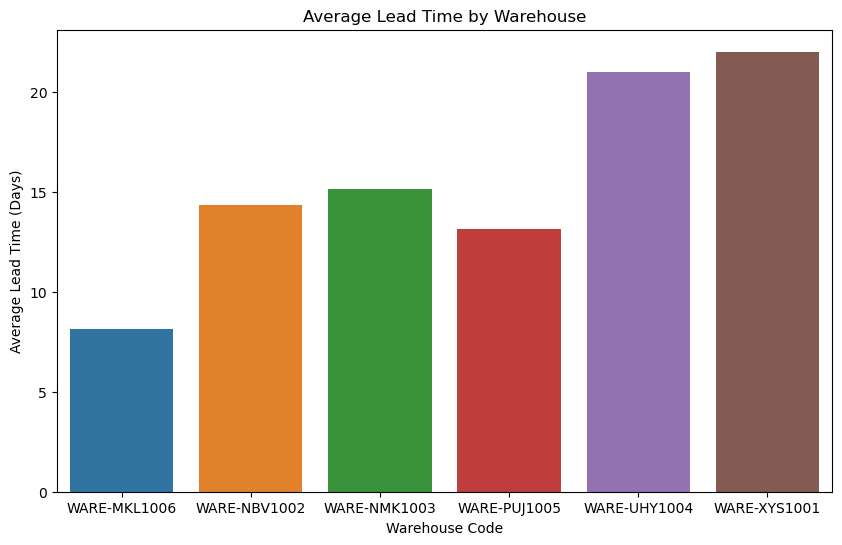

In [12]:
data1['OrderDate'] = pd.to_datetime(data1['OrderDate'], errors='coerce')
data1['ShipDate'] = pd.to_datetime(data1['ShipDate'], errors='coerce')

data1['Lead_Time'] = (data1['ShipDate'] - data1['OrderDate']).dt.days

print(data1[['OrderDate', 'ShipDate', 'Lead_Time']].head())

warehouse_efficiency = data1.groupby('WarehouseCode').agg(
    Average_Lead_Time=('Lead_Time', 'mean')
).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=warehouse_efficiency, x='WarehouseCode', y='Average_Lead_Time')
plt.title("Average Lead Time by Warehouse")
plt.xlabel("Warehouse Code")
plt.ylabel("Average Lead Time (Days)")
plt.show()


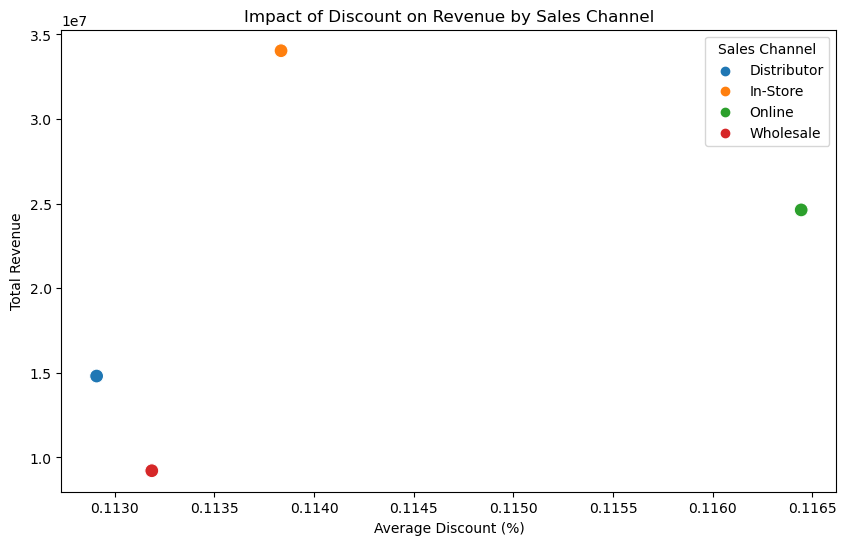

In [13]:
discount_impact = data1.groupby('Sales Channel').agg(
    Avg_Discount=('Discount Applied', 'mean'),
    Total_Revenue=('Revenue', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=discount_impact, x='Avg_Discount', y='Total_Revenue', hue='Sales Channel', s=100)
plt.title("Impact of Discount on Revenue by Sales Channel")
plt.xlabel("Average Discount (%)")
plt.ylabel("Total Revenue")
plt.show()


In [32]:
date_columns = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']
for col in date_columns:
    data1[col] = pd.to_datetime(data1[col], format="%d/%m/%Y", errors="coerce")

missing_data = data1.isnull().sum()
print(missing_data[missing_data > 0])


ProcuredDate        7991
DeliveryDate        7991
Procure_to_Order    7991
Ship_to_Delivery    7991
dtype: int64


In [34]:
print(data2[date_columns].isna().sum())

ProcuredDate    0
OrderDate       0
ShipDate        0
DeliveryDate    0
dtype: int64


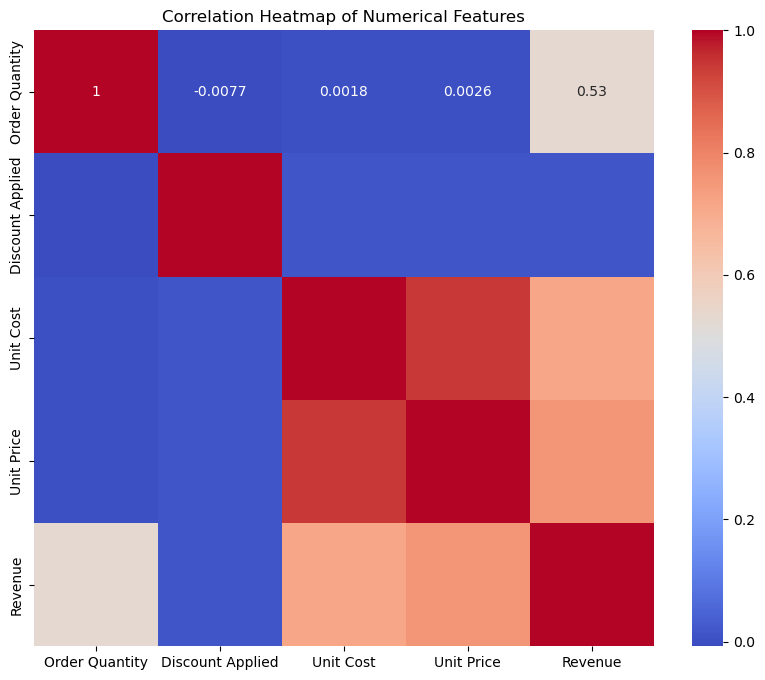

In [19]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data1[['Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price', 'Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [20]:
data1['Profit Margin'] = (data1['Unit Price'] - data1['Unit Cost']) * data1['Order Quantity']


In [35]:
data2.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.075,"1,001.18","1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/18,USD,14,20,196,27,3,0.075,"3,348.66","3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/18,USD,21,16,213,16,1,0.050,781.22,"1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/18,7/6/18,USD,28,48,107,23,8,0.075,"1,464.69","2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/18,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.100,"1,476.14","1,822.40"


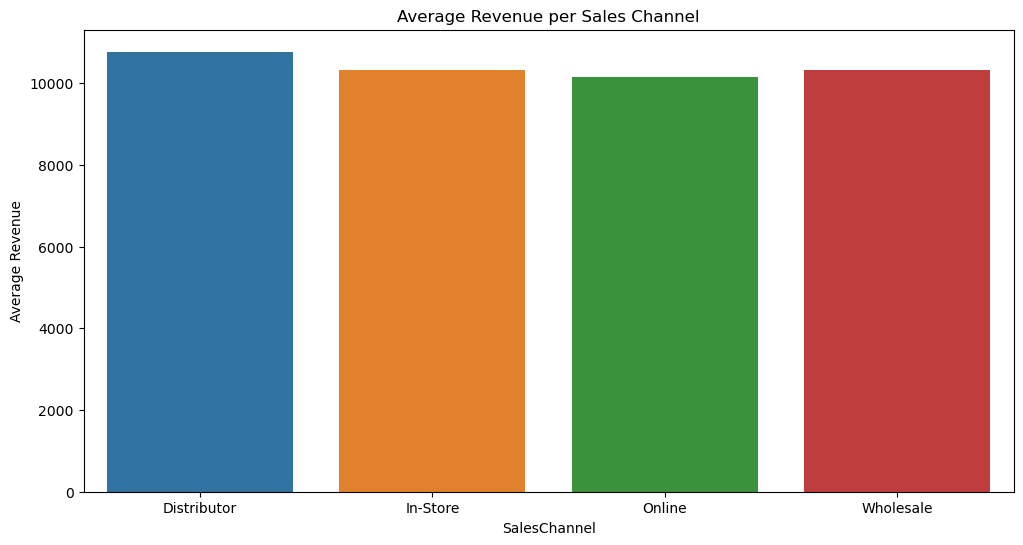

In [23]:

channel_analysis = data1.groupby('Sales Channel').agg(
    Average_Revenue=('Revenue', 'mean'),
    Average_Lead_Time=('Lead_Time', 'mean'),
    Total_Orders=('OrderNumber', 'nunique')
).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=channel_analysis, x='Sales Channel', y='Average_Revenue')
plt.title("Average Revenue per Sales Channel")
plt.xlabel("SalesChannel")
plt.ylabel("Average Revenue")
plt.show()


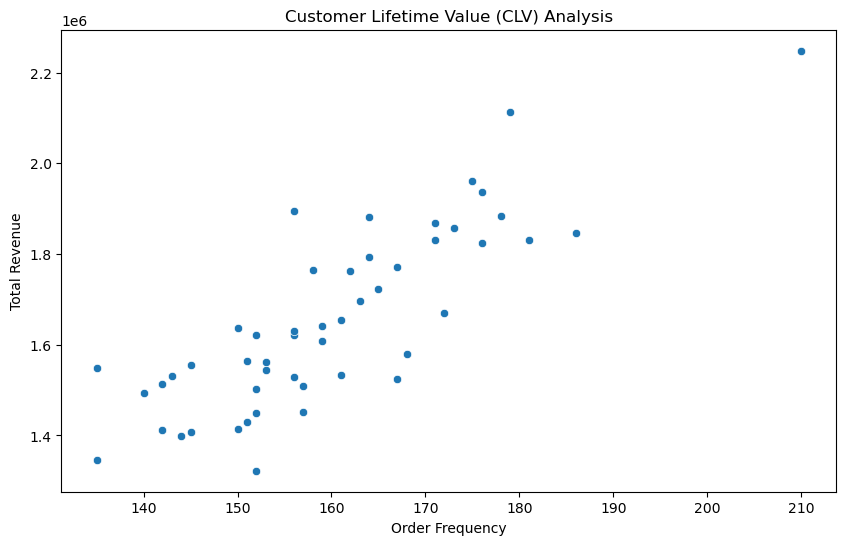

In [24]:
customer_clv = data1.groupby('_CustomerID').agg(
    Total_Revenue=('Revenue', 'sum'),
    Order_Frequency=('OrderNumber', 'nunique')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_clv, x='Order_Frequency', y='Total_Revenue')
plt.title("Customer Lifetime Value (CLV) Analysis")
plt.xlabel("Order Frequency")
plt.ylabel("Total Revenue")
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


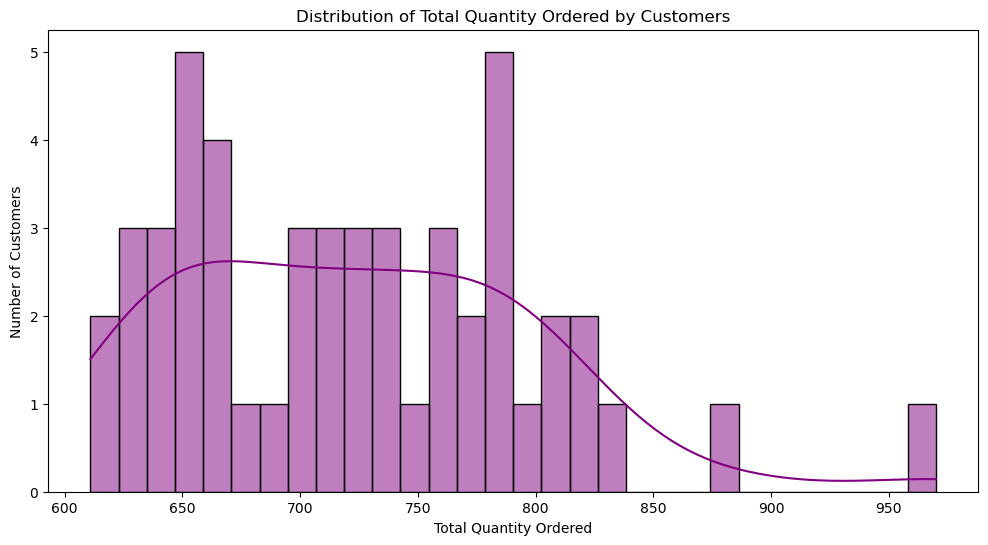

In [25]:
#Customer Buying Patterns Analysis

customer_stats = data1.groupby('_CustomerID').agg(
    Total_Orders=('OrderNumber', 'nunique'),
    Total_Quantity=('Order Quantity', 'sum'),
    Avg_Order_Size=('Order Quantity', 'mean')
).reset_index()

plt.figure(figsize=(12, 6))
sns.histplot(customer_stats['Total_Quantity'], bins=30, kde=True, color="purple")
plt.title("Distribution of Total Quantity Ordered by Customers")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Number of Customers")
plt.show()


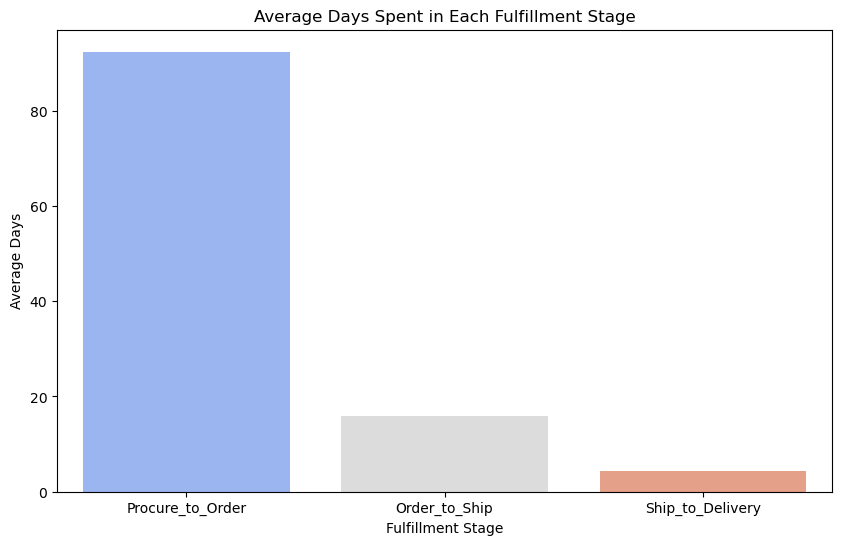

In [38]:
#Order Fulfillment Analysis: Analyzing Delays and Bottlenecks
date_columns = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']
for col in date_columns:
    data2[col] = pd.to_datetime(data2[col], errors='coerce')  # Coerce will set invalid parsing to NaT

data2['Procure_to_Order'] = (data2['OrderDate'] - data2['ProcuredDate']).dt.days
data2['Order_to_Ship'] = (data2['ShipDate'] - data2['OrderDate']).dt.days
data2['Ship_to_Delivery'] = (data2['DeliveryDate'] - data2['ShipDate']).dt.days


stage_delay = data2[['Procure_to_Order', 'Order_to_Ship', 'Ship_to_Delivery']].mean().reset_index()
stage_delay.columns = ['Stage', 'Average_Days']

plt.figure(figsize=(10, 6))
sns.barplot(data=stage_delay, x='Stage', y='Average_Days', palette="coolwarm")
plt.title("Average Days Spent in Each Fulfillment Stage")
plt.xlabel("Fulfillment Stage")
plt.ylabel("Average Days")
plt.show()


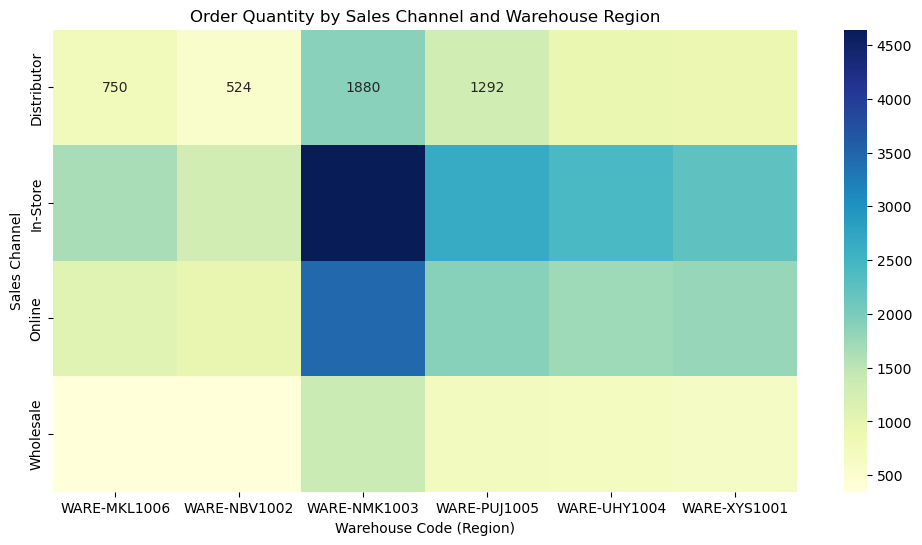

In [67]:
#Sales Channel and Regional Interaction: Heatmap of Sales Quantity
channel_region_pivot = data1.pivot_table(values='Order Quantity', index='Sales Channel', columns='WarehouseCode', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(channel_region_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Order Quantity by Sales Channel and Warehouse Region")
plt.xlabel("Warehouse Code (Region)")
plt.ylabel("Sales Channel")
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering
data_ml = data1.copy()
data_ml['Order_Month'] = data_ml['OrderDate'].dt.month
data_ml['Order_Year'] = data_ml['OrderDate'].dt.year
data_ml['Revenue'] = (data_ml['Order Quantity'] * (data_ml['Unit Price'] - data_ml['Unit Cost'])) - data_ml['Discount Applied']

features = ['Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price', 'Order_Month', 'Order_Year']
target = 'Revenue'

X = data_ml[features]
y = data_ml[target]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Mean Squared Error: 367574.25
R2 Score: 0.98


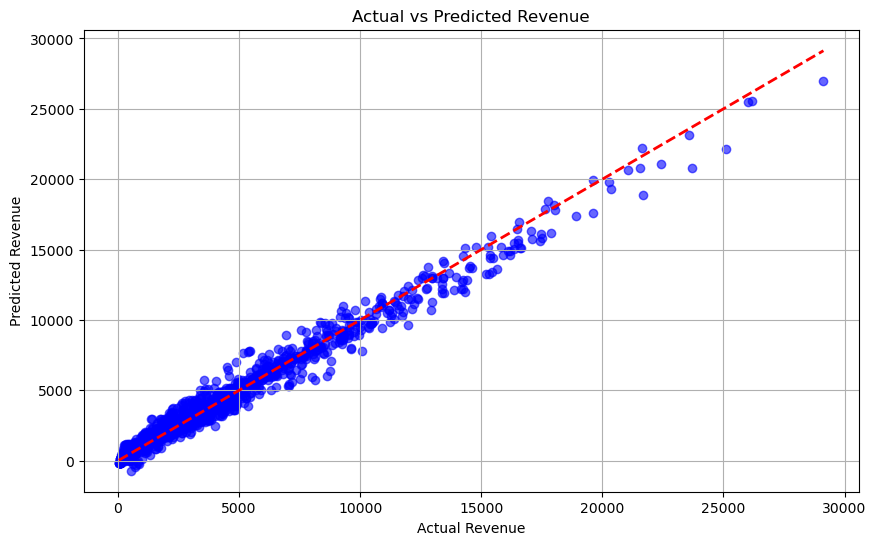

In [40]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.grid()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


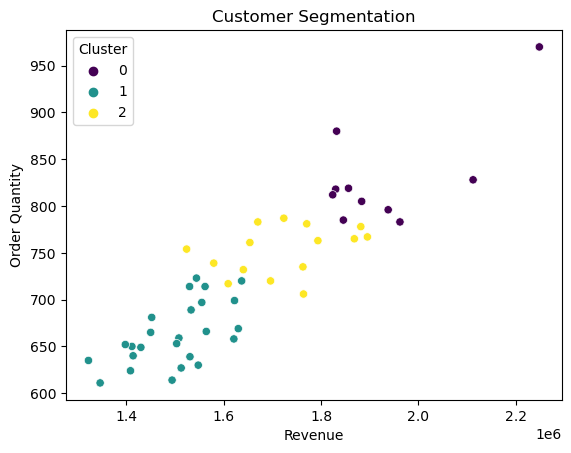

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating customer data
customer_data = data1.groupby('_CustomerID').agg({
    'Order Quantity': 'sum',
    'Revenue': 'sum',
    'OrderNumber': 'count'  # Frequency of orders
}).reset_index()

# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Order Quantity', 'Revenue', 'OrderNumber']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualization
sns.scatterplot(x=customer_data['Revenue'], y=customer_data['Order Quantity'], hue=customer_data['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Revenue')
plt.ylabel('Order Quantity')
plt.show()


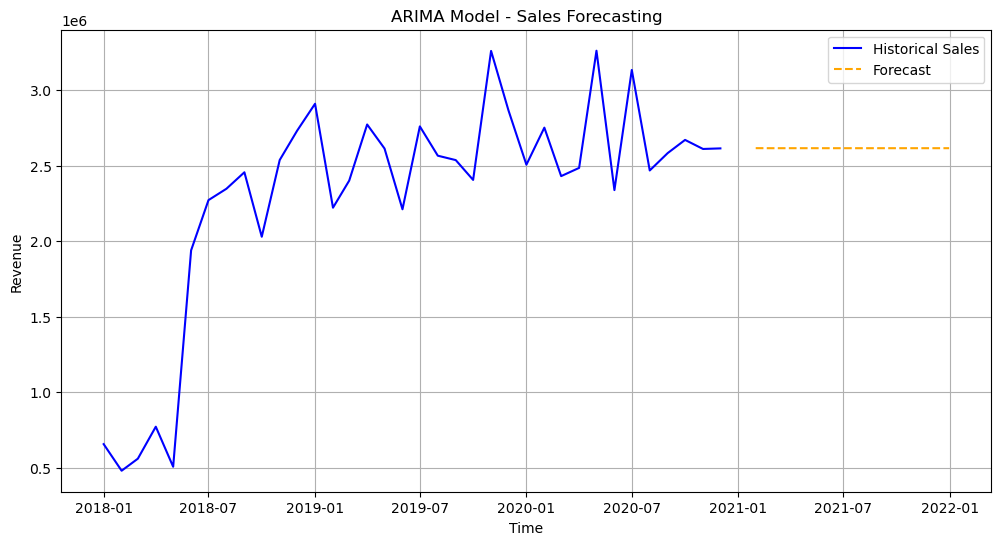

In [44]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Aggregating monthly sales
data1['Order_Month'] = data1['OrderDate'].dt.to_period('M')
monthly_sales = data1.groupby('Order_Month')['Revenue'].sum()

# Train ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=12)  # Next 12 months

# Convert PeriodIndex to DatetimeIndex for plotting
historical_index = monthly_sales.index.to_timestamp()  # Convert to datetime for Matplotlib
forecast_index = pd.date_range(
    start=historical_index[-1] + pd.offsets.MonthBegin(1),
    periods=len(forecast),
    freq='M'
)

# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(historical_index, monthly_sales, label='Historical Sales', color='blue')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', color='orange')
plt.title('ARIMA Model - Sales Forecasting')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define churn: customers who haven't ordered in the last 6 months
data1['LastOrderDate'] = data1.groupby('_CustomerID')['OrderDate'].transform('max')
data1['Churn'] = (data1['LastOrderDate'] < '2024-05-01').astype(int)  # Assuming today is Nov 2024

# Aggregating customer-level features
customer_data = data1.groupby('_CustomerID').agg({
    'Revenue': 'sum',
    'OrderNumber': 'count',  # Frequency
    'Order Quantity': 'mean'
}).reset_index()
customer_data['Churn'] = data1.groupby('_CustomerID')['Churn'].first().values

# Train/Test split
X = customer_data[['Revenue', 'OrderNumber', 'Order Quantity']]
y = customer_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [48]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# User-Item Matrix
pivot_table = data1.pivot_table(index='_CustomerID', columns='_ProductID', values='Order Quantity', fill_value=0)

# Apply SVD
svd = TruncatedSVD(n_components=10, random_state=42)
latent_matrix = svd.fit_transform(pivot_table)

# Recommendations for a specific user
user_idx = 0  # Change to test different users
user_vector = latent_matrix[user_idx]
similarity_scores = cosine_similarity([user_vector], latent_matrix)

# Top recommendations
top_users = np.argsort(similarity_scores[0])[-5:]  # Top 5 similar users
print(f"Top recommended users: {top_users}")


Top recommended users: [29 10 12 16  0]


OrderDate    0
Revenue      0
dtype: int64
Mean Squared Error: 113683195.83517717
R^2 Score: -0.14813808691217223


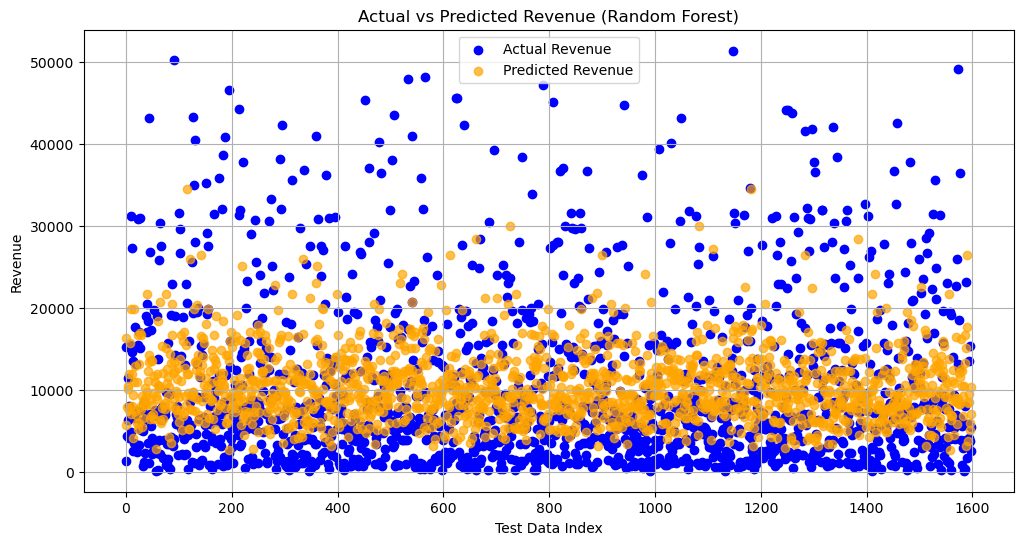

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Check for missing values
print(data1[['OrderDate', 'Revenue']].isnull().sum())

# Handle missing values
# Fill missing values in the Revenue column with the median
data1['Revenue'].fillna(data1['Revenue'].median(), inplace=True)

# Feature Engineering: Extracting features from OrderDate
data1['Order_Year'] = data1['OrderDate'].dt.year
data1['Order_Month'] = data1['OrderDate'].dt.month
data1['Order_Day'] = data1['OrderDate'].dt.day

# Selecting features and target
X = data1[['Order_Year', 'Order_Month', 'Order_Day']]  # Features
y = data1['Revenue']  # Target

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plotting Predictions vs Actual
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Revenue')
plt.scatter(range(len(y_pred)), y_pred, color='orange', label='Predicted Revenue', alpha=0.7)
plt.title('Actual vs Predicted Revenue (Random Forest)')
plt.xlabel('Test Data Index')
plt.ylabel('Revenue')
plt.legend()
plt.grid()
plt.show()
